# Integrated Project 1 - Video game sales

In this document, I will be taking a look at the video game market, via a dataset containing  different releases, their receptions, sales, review scores and platforms they were released for. 
I will try to produce an outlook for what platform will be relevent this year, and what genres of games are more popular, to better specialize any marketing campaigns.
I will also build a user profile for the different regions, to target advertising even better.

## Initialization

In [41]:
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.5)


In [42]:
# Importing libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import datetime
import math
from scipy import stats as st

## Loading Data

In [43]:
# Loading the dataset- we only have one, so a short name will be okay.
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('D:/Csvs/games.csv')

## Preparing data

I shall take a look at the data and pre-process it. Address missing values, making sure naming conventions in the data frame make sense and are readable,  convert all data types to correct ones that are easy to work with, and enriching the data.

But first, taking a first look-

In [44]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


I see many missing values, in different columns. I will further explore them to see if patterns emerge, and to see in what columns they even need to be filled in.
Column names are capitalized and need to be lowered.
Seems some numeric values that are of the float type need to be converted to integers.
Specifically 'User_score' is a string, will also be converted to float.

## Changing column names

In [45]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Treating missing values

Lets first look at the two missing names from the list to see if they can be dropped- also see if they are the same two missing values from 'genre'

In [46]:
print(df[df['name'].isna()])
# Seeing as these are just two rows, and give us no information they can be dropped, clearing both 'name' and 'genre' columns 
# from missing values
df = df[df['name'].notna()]
print(df[df['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Taking a look at the missing values from 'year_of_release'-

In [47]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


There doesn't seem to be a particular pattern for the missing years on these games. It might be possible to fill these values
with values that are close to true by looking at what consoles they were released on, but seeing as how we are probably only
going to be looking at a specific time period and platforms, and this is a small chunck of the data, we can leave these blank 
for now.

Taking a look at the missing values from 'critic_score'-

In [48]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Again, we don't see a pattern emerging. The 'critic_score' column is the one with the most missing values, so we know for a fact they don't always appear together with other missing values.
There could be some reasons for these- games that are old enough for reviews to be irrelevant, games that are almost unheard of 
and so nobody bothered to review them, or simple human error. Seeing as we will look mostly on the sales of popular and reletively new games that sold well, there seems to be no reason to fill these- and we can't drop them, as they make up about half the dataset.

This is mostly also true for the 'rating' and 'user_score' columns

However, since 'year_of_release' and 'user_score' need their type converted, all missing values there will need to be replaced first.

In [49]:
df['year_of_release'].fillna(value = 0, inplace = True)
df['user_score'].fillna(value = 0, inplace = True)
# 'user_score' is set as string type since some values are input as 'tbd'-
df['user_score'].replace(to_replace = 'tbd', value = 0, inplace = True)

## Changing data types

Now to change the data types for 'year_of_release' into integer, and 'user_score' into float.

In [50]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = pd.to_numeric(df['user_score'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Enriching data

Adding a column with the sum of all sales

In [52]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] +df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38


## Data Analysis

We are trying to produce information for a marketing campaign in the year 2017- we should make sure we are looking at data from relevant years.

First, lets see a representation of game releases throughout the years-

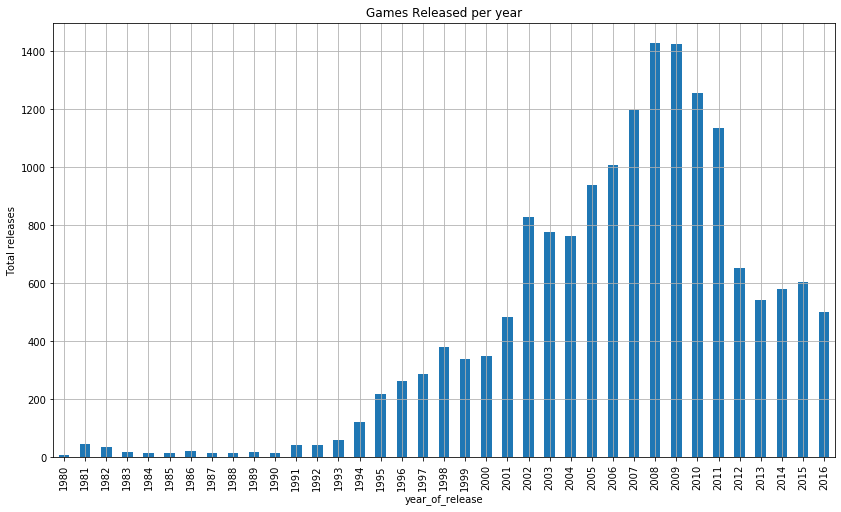

In [53]:
df_yearly_releases = df.query('year_of_release != 0').pivot_table(values = 'name', index = 'year_of_release', aggfunc = 'count')
df_yearly_releases.plot(kind = 'bar', figsize = (14,8), grid = True, legend = False, ylabel = 'Total releases', title = 'Games Released per year')

There is a significant jump in video game production in the early 2000's, with the two 'golden years' being 2008-2009.
Most of our data is from 2004 onward, and also, data from 15 years ago might not give us conclusions relevant to today.

It makes sense to look at the different platforms- how much they sold, and how long they lasted.
First lets pick the most popular platforms.

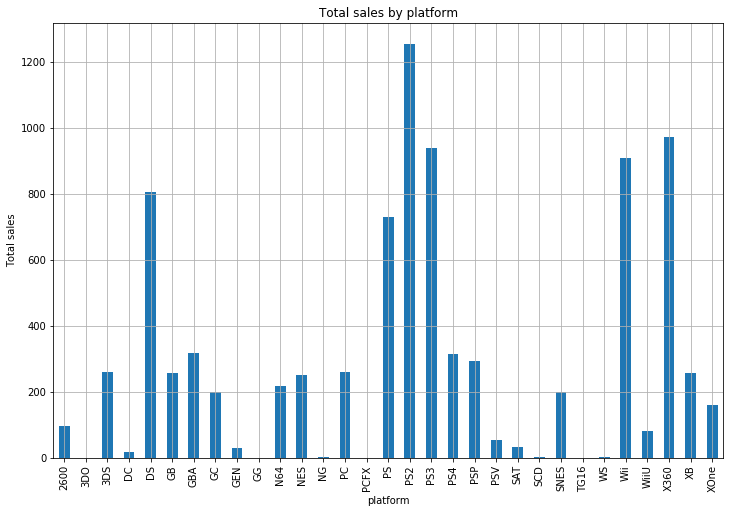

In [54]:
df_platform_sales = df.pivot_table(values = 'total_sales', index = 'platform', aggfunc = 'sum')
df_platform_sales.plot(kind = 'bar', figsize = (12,8), grid = True, legend = False, ylabel = 'Total sales' , title = 'Total sales by platform')

We will for now look at the top 5- DS, PS2, PS3, Wii, and XB, between 2003 and now.

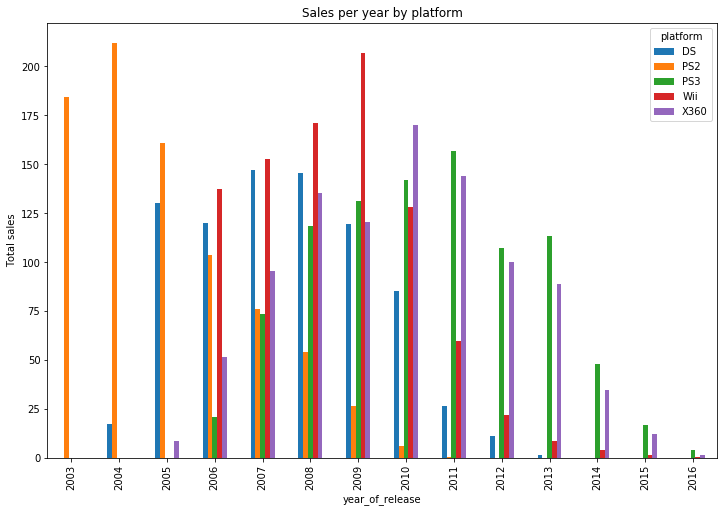

In [55]:
top_platforms =['DS', 'PS2', 'PS3', 'Wii', 'X360']
yearly_platform_sale = (df
                        .query('2003 <= year_of_release <= 2016 and platform in @top_platforms')
                        .pivot_table(values = 'total_sales',
                                     index = 'year_of_release',
                                     columns = 'platform',
                                     aggfunc = 'sum')
                       )
yearly_platform_sale.plot(kind = 'bar', figsize = (12,8), ylabel = 'Total sales', title = 'Sales per year by platform')

It seems, that platforms tend to peak a few years after they are released, then slowly fade away.
This is pretty constant for each platform, even if the newer iteration of the same console line is already on the market.
They seems to each last 8-10 years from release until they completetly stop making sales.

We are going to use data only from 2006 and onward- the information from then seems relevant seeing as it is also the time of the rise of a new generation of consoles- just like the last few years, including 2017.

In [56]:
df_recent = df.query('year_of_release >= 2006')

Lets look at what platforms are still present in our data, and try to see which are still profitable.

In [57]:
df_recent['platform'].value_counts()

DS      1979
PS3     1306
Wii     1286
X360    1214
PSP     1083
PS2      805
PC       776
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, dtype: int64

Lets try and see which are still growing, and which are fading and may become irrelevant

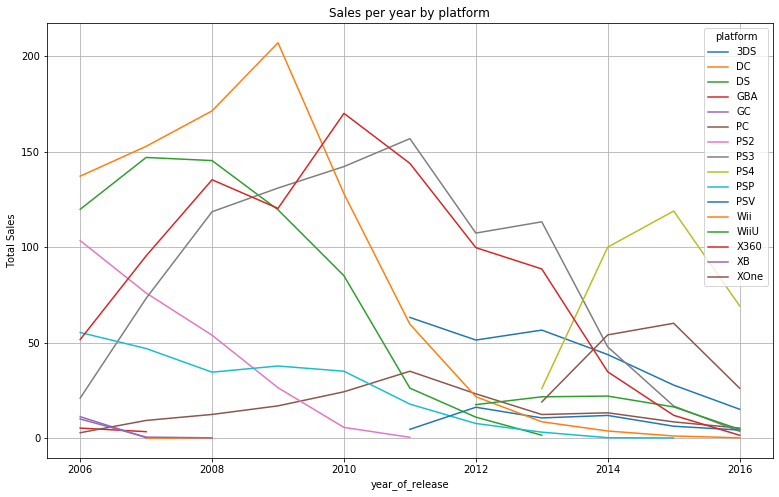

In [58]:
yearly_platform_sale_recent = (df_recent
                        .pivot_table(values = 'total_sales',
                                     index = 'year_of_release',
                                     columns = 'platform',
                                     aggfunc = 'sum')
                       )
yearly_platform_sale_recent.plot(kind = 'line', figsize = (13,8), grid = True, ylabel = 'Total Sales', title = 'Sales per year by platform')

I take into account that the totals for 2016 are not complete, and that explains why all lines go down from 2015 to 2016.
Taking that into account, it seems there are exactly three platforms that still might be on the rise- the PS4, XOne, and 3DS.

I will narrow the data down even more, and take a closer look at those three platforms.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


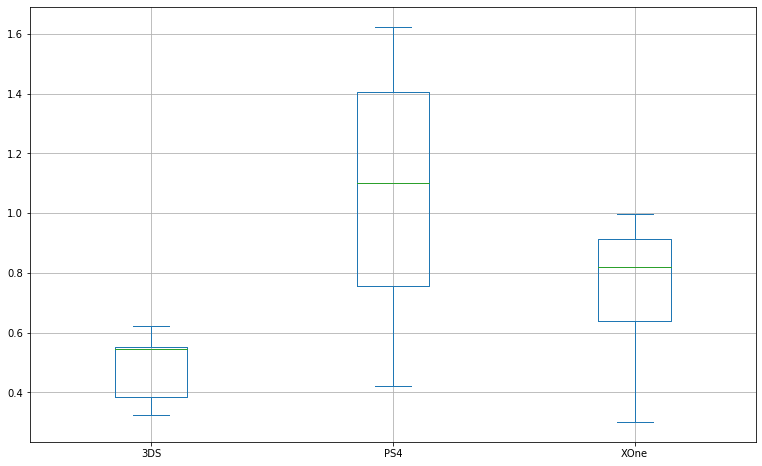

In [59]:
rising_platforms = ['PS4', 'XOne', '3DS']
yearly_platform_sale_recent_rising = (df_recent.query('platform in @rising_platforms')
                        .pivot_table(values = 'total_sales',
                                     index = 'year_of_release',
                                     columns = 'platform')
                       )
yearly_platform_sale_recent_rising.plot(kind = 'box', figsize = (13,8), grid = True)

Judging from just this, it seems we have a winner. The PS4's average earnings are above both the XOne's and 3DS.
Still, there is a segment of its games that earn less than the average XOne game- meaning it is still in the running. 
The XOne still might grow faster than PS4, so it is best to still keep it in mind.


Video game sales are about more than the success of the specific console- I must take other metrics into account, like the quality of the specific game. This is subjective, however, so I will have to use the next best thing- review scores.
To isolate variables, I will narrow down the comparison to just games from the PS3- a recent enough era, and a popular console with many entries in our data.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.041469,0.033480,0.022297,0.040331,0.046031,-0.036507,0.040083
na_sales,0.041469,1.000000,0.816030,0.367313,0.871531,0.450681,0.137144,0.937639
eu_sales,0.033480,0.816030,1.000000,0.404824,0.973867,0.376543,0.084722,0.959079
jp_sales,0.022297,0.367313,0.404824,1.000000,0.407136,0.195761,0.170002,0.483455
other_sales,0.040331,0.871531,0.973867,0.407136,1.000000,0.390825,0.110032,0.975696
critic_score,0.046031,0.450681,0.376543,0.195761,0.390825,1.000000,0.629005,0.427875
user_score,-0.036507,0.137144,0.084722,0.170002,0.110032,0.629005,1.000000,0.126691
total_sales,0.040083,0.937639,0.959079,0.483455,0.975696,0.427875,0.126691,1.000000


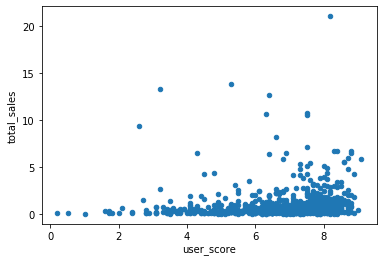

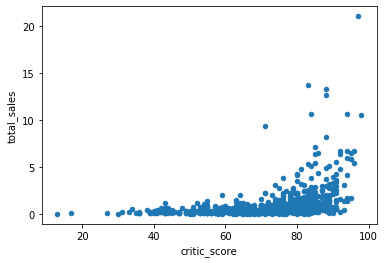

In [60]:
# When making the data set, I will exclude all '0' scores- they are artificial and were used to fill in the missing values
df_ps3 = df.query('platform == "PS3" and user_score != 0')


df_ps3.plot.scatter(x = 'user_score', y = 'total_sales')
df_ps3.plot.scatter(x = 'critic_score', y = 'total_sales')
df_ps3.corr()

The correlation here is much less strong than one could expect- user scores almost literally do not correlate with sale numbers, and critic scores only a bit more than that.
However, when looking at the scatter plots we do see some examples of games that stood out earning much more than their competitors- and these examples tend to appear more with higher scores.

Here I'll observe something different- how well do games that exist for multiple platforms do on each platform?

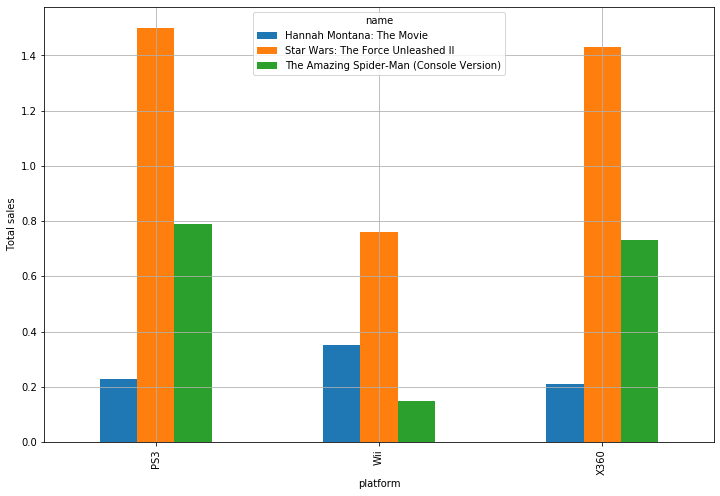

In [61]:
#Lets look at games that came out for multiple platform from about the same era
gen_3_consoles = ['PS3', 'Wii', 'X360']
df_dups = df_recent[df_recent['name'].duplicated(keep = False)].query('platform in @gen_3_consoles')
df_dups['name'].value_counts()

#Lets pick three game out of the bunch-
multi_console_games = ['The Amazing Spider-Man (Console Version)', 'Star Wars: The Force Unleashed II', 'Hannah Montana: The Movie' ]

same_game_different_console = (df_dups
                               .query('name in @multi_console_games')
                        .pivot_table(values = 'total_sales',
                                     index = 'platform',
                                     columns = 'name',
                                     aggfunc = 'sum')
                       )
same_game_different_console.plot(kind = 'bar', figsize = (12,8), grid = True , ylabel = 'Total sales')

In this plot its possible to see just what the competition looks like- games that exist for multiple platform tend to sell about the same for PS3 and X360, and much less for the Wii- but some games actually sell much more one the Wii- about twice as much as either of the two! 
Probably has to do with the target audience for the game / console, and the technical demands the game has.

How do the different genres do againts each other? What grosses the most profits over all, and what game is on average most likely to succeed? 

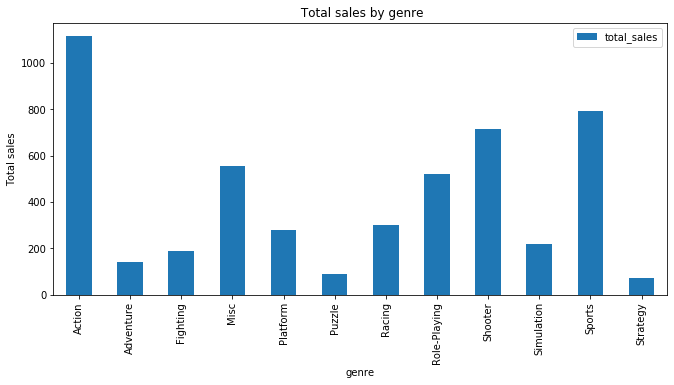

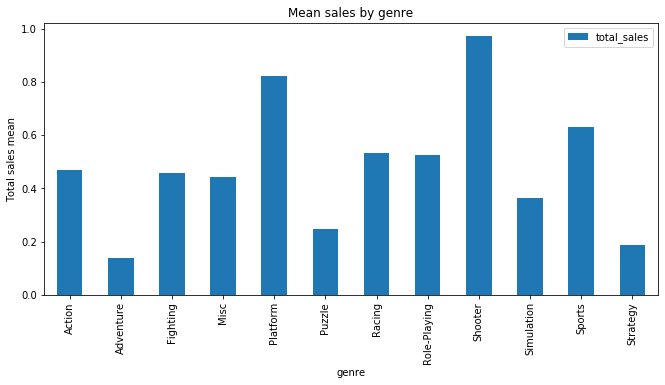

In [62]:
df_genres = df_recent.pivot_table(values = 'total_sales', index = 'genre', aggfunc='sum')
df_genres.plot(kind = 'bar', title = ' Total sales by genre', figsize = (11,5), ylabel = 'Total sales')

df_genres_mean = df_recent.pivot_table(values = 'total_sales', index = 'genre')
df_genres_mean.plot(kind = 'bar', title = 'Mean sales by genre', figsize = (11,5), ylabel = 'Total sales mean')

The action genre grosses the most overall profits- but that is affected by it being the genre with the most entries.
Shooters and platform games arent as big a part of the market- but each individual game is more likely to turn a decent profit than just any random action game.

## User Profiles

In this segment I'm going to take a look at our data broken up by sales in the three different regions- North America, Europe, and Japan.
I will be taking a look at what platforms, genres, and ratings for games are what sells in each region- 
Creating a sort of user profile for each.

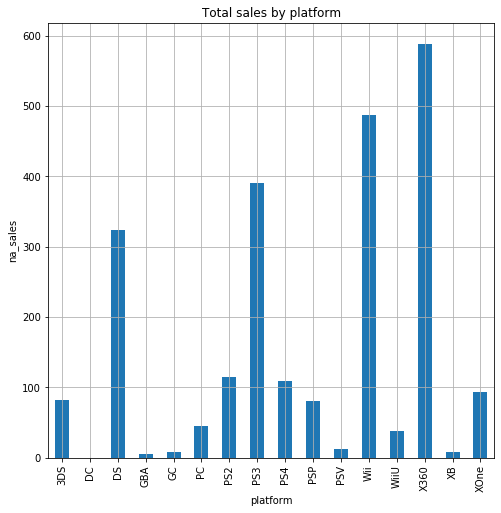

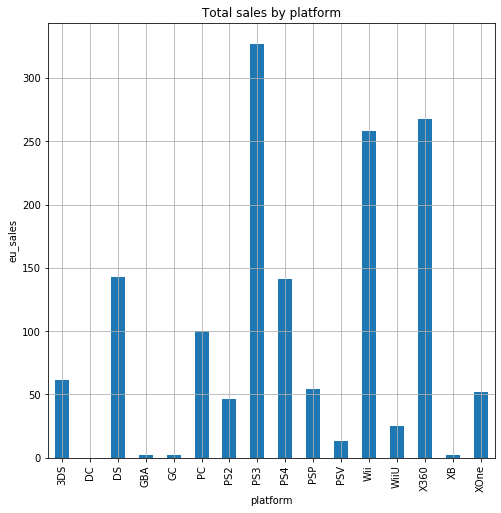

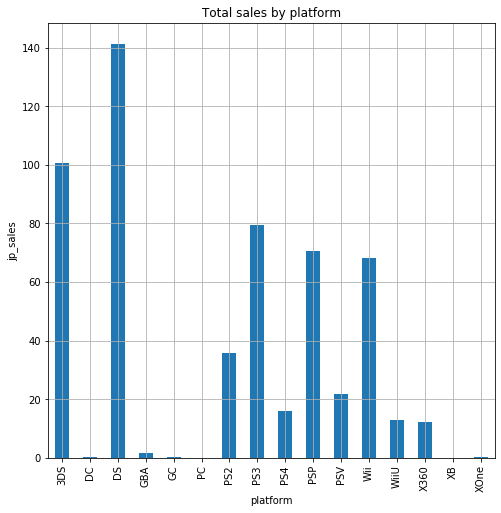

In [63]:
sale_columns = ['na_sales', 'eu_sales', 'jp_sales']
for market in sale_columns:
    plot_table = df_recent.pivot_table(values = market, index = 'platform', aggfunc = 'sum')
    plot_table.plot(kind = 'bar', figsize = (8,8), grid = True, title = 'Total sales by platform', legend = False, ylabel = market)

#Now I can mark the top 5 consoles in each region, and look at their market share there.


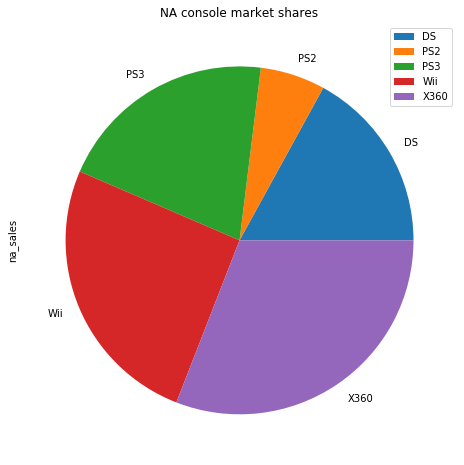

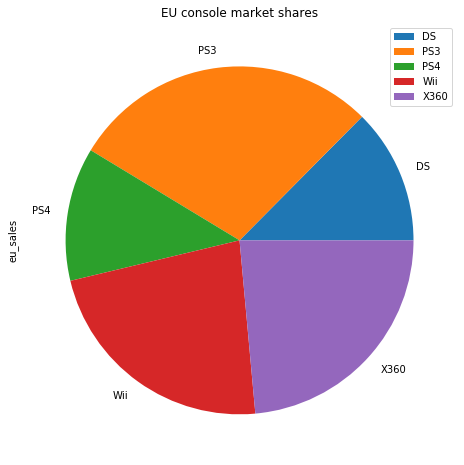

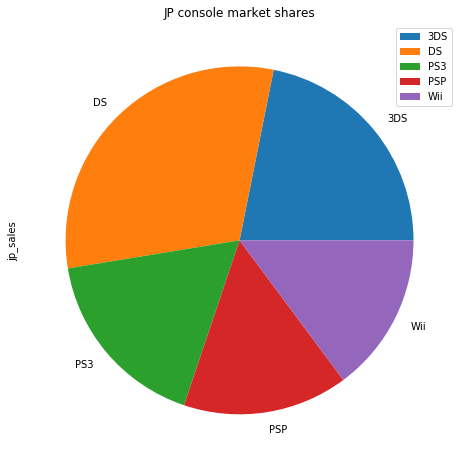

In [64]:
top5_na = ['X360', 'Wii', 'PS3', 'DS', 'PS2']
top5_eu = ['X360', 'Wii', 'PS3', 'DS', 'PS4']
top5_jp = ['PSP', 'Wii', 'PS3', 'DS', '3DS']

na_console_shares =  df_recent.pivot_table(values = 'na_sales', index = 'platform', aggfunc = 'sum').query('platform in @top5_na')
na_console_shares.plot(kind = 'pie', y = 'na_sales', figsize = (8,8), title = 'NA console market shares')

eu_console_shares =  df_recent.pivot_table(values = 'eu_sales', index = 'platform', aggfunc = 'sum').query('platform in @top5_eu')
eu_console_shares.plot(kind = 'pie', y = 'eu_sales', figsize = (8,8), title = 'EU console market shares')

jp_console_shares =  df_recent.pivot_table(values = 'jp_sales', index = 'platform', aggfunc = 'sum').query('platform in @top5_jp')
jp_console_shares.plot(kind = 'pie', y = 'jp_sales', figsize = (8,8), title = 'JP console market shares')

NA and EU regions are a battleground for PS vs. X systems, with X360 taking a lead in NA while PS3 is winning in EU. In both, Wii is a strong competitor, and the DS is very much present.
EU seems to be an earlier adopter of the PS4, while the PS2 is still in the top 5 for NA.

JP draws a different picture- the DS is still most dominant, even though it is supposedly being phased out by the 3DS, its ancestor. Wii still has a presence, neck-and-neck with PS3 and PSP.
All consoles in Japanese top 5 are from Japanese companies- Xbox is nowhere to be seen.

Lets look at how the different genres perform in the different regions.

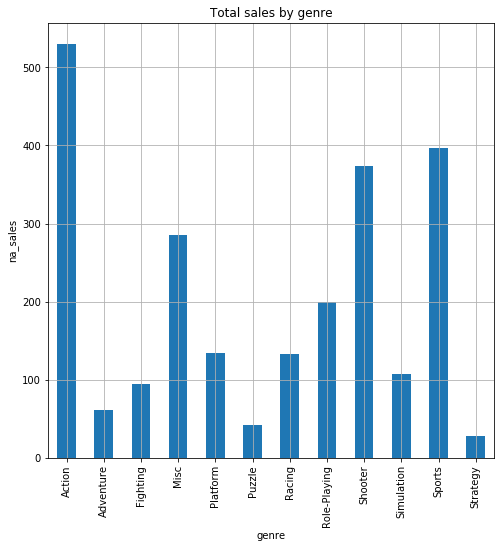

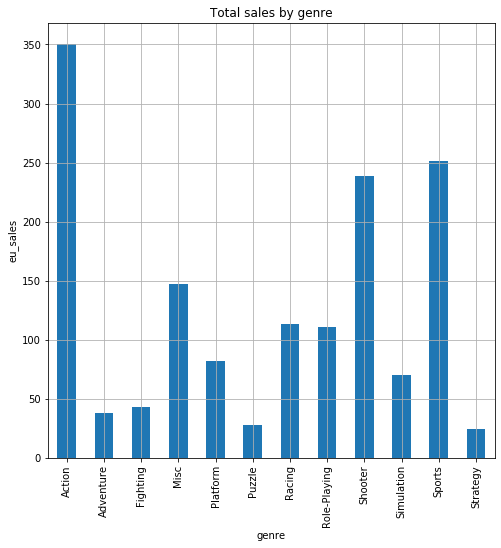

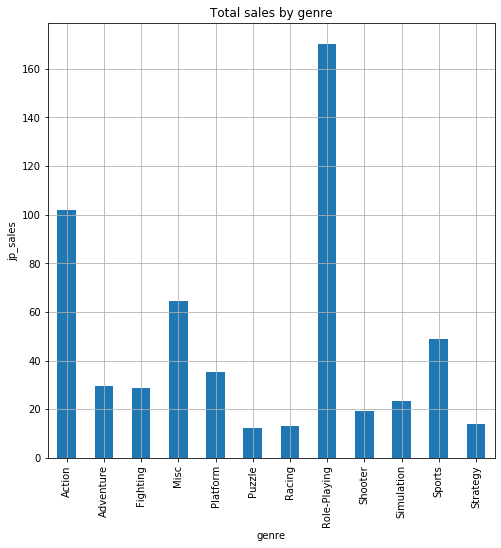

In [65]:
for market in sale_columns:
    plot_table = df_recent.pivot_table(values = market, index = 'genre', aggfunc = 'sum')
    plot_table.plot(kind = 'bar', figsize = (8,8), grid = True, title = 'Total sales by genre', legend = False, ylabel = market)

NA and EU draw a remarkedly similar picture- same leading genres and in the same order- Action with a big lead, than sports and shooters, and after a small gap comes the Misc category.

Again, JP is very different- Action is at second place, dwarfed by the success of the role-playing genre. Misc is third, and only then sports.

Now to see if the different regions gravitate towards games judging by their ESRB rating-

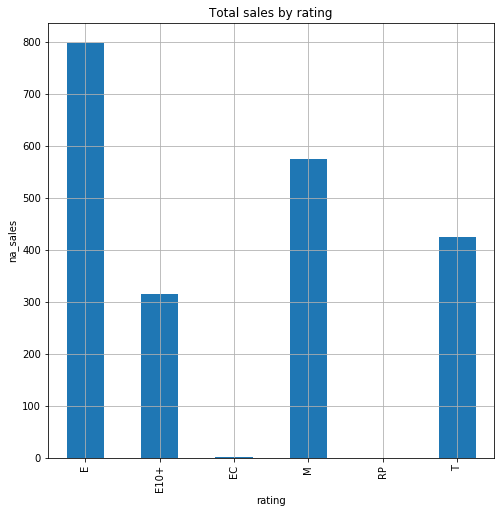

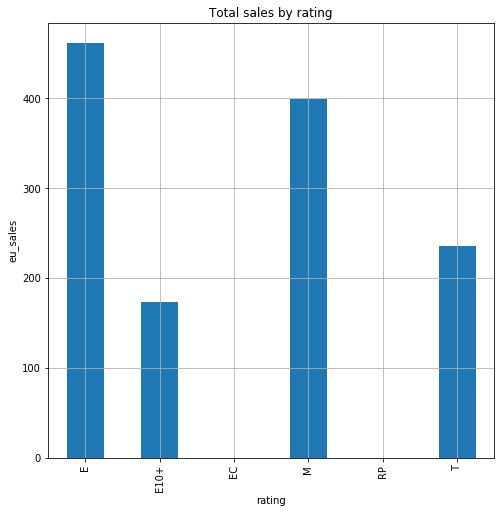

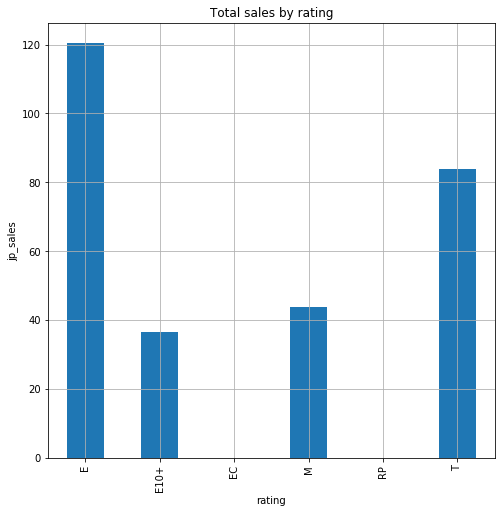

In [66]:
for market in sale_columns:
    plot_table = df_recent.pivot_table(values = market, index = 'rating', aggfunc = 'sum')
    plot_table.plot(kind = 'bar', figsize = (8,8), grid = True, title = 'Total sales by rating', legend = False, ylabel = market)

This time all three look alike, except for a small difference- it appears that the "M" (Mature) rating is not as appealing in Japan as it is in the other two regions. T rating is somewhat more popular there in relation to the big winner in all three regions, "E".

This is probably due to cultural diffrences between Japan and the west- either because of the actual age of the audience for video games, or just because of the content they find appealing. A rating gaining more sales does not equate to the crowd being that age.

## Posing different hypotheses:

I want to see a measure of the difference in user between different platforms. The only metric we have that relates to the opinion of the specific audience is the 'user_score' column.
I will test the hypothesis that the average user on PC rates games the same as a user on the XOne.
So:
    
    H0: Average user ratings of the Xbox One and PC platforms are the same.
    H1: Average user ratings of the Xbox One and PC platforms are different.

In [67]:
#Checking to see if variances are close to each other for statistic test-

print('PC user score variance is:', df_recent.query('platform == "PC" and user_score != 0')['user_score'].var())
print('Xone user score variance is:', df_recent.query('platform == "XOne" and user_score != 0')['user_score'].var())
print()

#Variances are close-

user_rating_pc_xone = st.ttest_ind(
                       df_recent.query('platform == "PC" and user_score != 0')['user_score'],
                       df_recent.query('platform == "XOne" and user_score != 0')['user_score'],
)

alpha = 0.03

print('p-value:', user_rating_pc_xone.pvalue)

if (user_rating_pc_xone.pvalue) < alpha :
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


PC user score variance is: 2.3152337067344613
Xone user score variance is: 1.9069968429360695

p-value: 0.014354742043413306
We reject the null hypothesis


P-value is quite far below the 3% alpha we set (to be a bit more strict than the standard 5%)- meaning the mean of user scores between these two platforms is not equal. This suggests that games for different platforms are embraced somewhat differently,
and if user satisfaction is a meaningful metric, it may be wise to treat different console fans differently.

Now that we understand a bit more about users and the way they give scores, lets see what they say about different genres:
    
    H0: Average user ratings for the Action and Sports genres are the same.
    H1: Average user ratings for the Action and Sports genres are different.
        

In [68]:
print('Action genre user score variance is:', df_recent.query('genre == "Action" and user_score != 0')['user_score'].var())
print('Sports genre user score variance is:', df_recent.query('genre == "Sports" and user_score != 0')['user_score'].var())
print()

user_rating_action_sports = st.ttest_ind(
                       df_recent.query('genre == "Action" and user_score != 0')['user_score'],
                       df_recent.query('genre == "Sports" and user_score != 0')['user_score'],
)

alpha = 0.03

print('p-value:', user_rating_action_sports.pvalue)

if (user_rating_action_sports.pvalue) < alpha :
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


Action genre user score variance is: 1.859580573081868
Sports genre user score variance is: 2.7323077580539117

p-value: 3.493183815903372e-11
We reject the null hypothesis


Again we see that mean scores are different across genres. Fans of different genres can be less or more critical of the games they get. If a genre gets a lot of big games released for it, users have a bigger selection to compare to, and competition for higher scores may become more fierce.

## General Conclusion

The main conclusion for this project is that the video game market is significantly varied. 
Different platforms, genres, countries of origin, user and critic scores all have an effect on how a specific game will do on the market. 

But there are trends and patterns that are major, and cannot be ignored- new platforms come out and fade away in waves, and the success of each is usually related to its predecessor's. 

A game shop would do well to understand its audience- what region they are from, what console is coming up currently.
In the west currently (the year 2017), a new generation of consoles is one to pay attention to- PS4, Xbox One, and probably a new release from Nintendo (there hasen't been one for a while).

For operations in the west (EU, NA)- you cannot go wrong with the latest shooter and a selection of actions games, for the newest consoles available. In NA, focus should be on Microsoft's systems, and in EU- Sony's. Both also have a market for Nintendo's latest.

For sales in JP, or any other more narrow-grouped market, more observations should be made- the market shares in Japan prove that local culture may affect the success of games to a major degree.